In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
#1. 데이터 불러오기
df = pd.read_csv('./GradientBoostingData.csv')

#2. X, y 분리
X = df[['Media', 'ITS Condition', 'A2P', 'TF']]
y = df['WST-8']

#3. Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

#4. Model 학습
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

#5. 예측 및 평가
y_pred = model.predict(X_test)

print("예측값:", y_pred)
print("실제값:", y_test.values)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

예측값: [0.08566667 0.083      0.13175    0.13175    0.09728571 0.268
 0.08566667 0.20366667 0.20366667 0.08566667 0.13175    0.147
 0.083      0.20366667 0.13175    0.41938095 0.268      0.41938095
 0.09728571 0.147      0.13175   ]
실제값: [0.09       0.118      0.136      0.087      0.106      0.317
 0.08       0.177      0.182      0.082      0.106      0.157
 0.107      0.193      0.095      0.50483333 0.192      0.4
 0.157      0.127      0.12      ]
MSE: 0.0013013545019897436
R^2: 0.8876445687887724


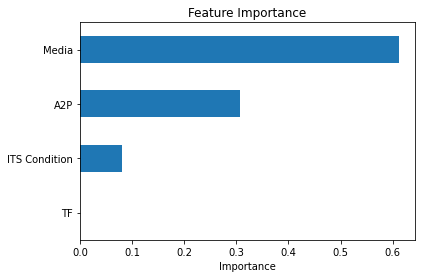

In [4]:
#6. feature importance 분석
feat_importance = model.feature_importances_ #GBR tree를 만들때 어떤 feature가 node로 많이 선정되었는지를 저장
feat_df = pd.Series(feat_importance, index=X.columns).sort_values()

feat_df.plot(kind='barh', title='Feature Importance')
plt.xlabel('Importance')
plt.show()

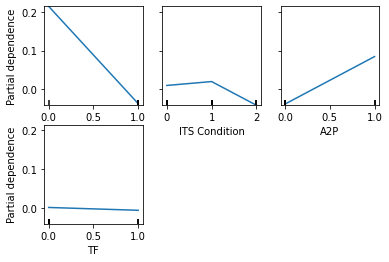

In [5]:
#7. Partial Dependence Plot (PDP)
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(model, X, ['Media', 'ITS Condition', 'A2P', 'TF'])
plt.show()

In [6]:
#8. GridSearchCV로 최적 조건 찾기

# 그리드 서치용 파라미터 후보 정의
param_grid = {
    'n_estimators' : [100, 500, 1000],
    'learning_rate' : [0.01, 0.05, 0.1],
    'max_depth' : [1, 2, 3, 4, 5]
}

# 그리드 서치 CV 설정
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='r2')

# 학습
grid_search.fit(X_train, y_train)

# 결과 출력
print("Best parameters:", grid_search.best_params_)
print("Best R2 score (CV):", grid_search.best_score_)

# 테스트셋 성능 확인
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)
print("Test set R2:", r2_score(y_test, y_pred2))
print("Test set MSE:", mean_squared_error(y_test, y_pred2))

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best R2 score (CV): 0.8351076696135853
Test set R2: 0.8809451350550984
Test set MSE: 0.0013789505572592757


In [ ]:
#9. 상위 조합 찾기
from itertools import product

# 가능한 조합
media_vals = [1]
its_vals = [0, 1, 2]
a2p_vals = [0, 1]
tf_vals = [0, 1]

param_combinations = list(product(media_vals, its_vals, a2p_vals, tf_vals))
grid_df = pd.DataFrame(param_combinations, columns=['Media', 'ITS Condition', 'A2P', 'TF'])

# 모델 예측
grid_df['Predicted WST-8'] = model.predict(grid_df)

# 상위 조합 5개
best_five = grid_df.sort_values(by='Predicted WST-8', ascending=False).head(5)
print(best_five)

    Media  ITS Condition  A2P  TF  Predicted WST-8
3       1              0    1   1         0.368556
2       1              0    1   0         0.327000
6       1              1    1   0         0.268000
7       1              1    1   1         0.243977
10      1              2    1   0         0.203667
